## Test Carmen RP curves

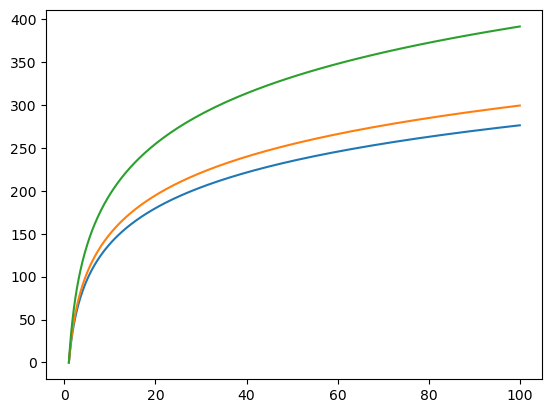

In [1]:
import numpy as np
import matplotlib.pyplot as plt
use_log = True
if use_log:
    rps_carmen = np.geomspace(1, 100, 200)
    exf_carmen = 1/rps_carmen
    values_carmen_RF = 60*np.log(rps_carmen)
    values_carmen_TC = 65*np.log(rps_carmen)
    values_carmen_combined = 85*np.log(rps_carmen)
else:
    rps_carmen = np.array([1, 2, 3, 5, 10, 20, 30, 40, 60, 80, 100])
    exf_carmen = 1/rps_carmen
    values_carmen_TC = np.array([5, 60, 85, 115, 140, 190, 215, 245, 295, 330, 355])
    values_carmen_RF = np.array([7, 65, 85, 110, 140, 160, 210, 245, 270, 295, 300])
    values_carmen_combined = np.array([20, 120, 160, 205, 240, 310, 350, 390, 430, 480, 510])
plt.plot(rps_carmen, values_carmen_RF)
plt.plot(rps_carmen, values_carmen_TC)
plt.plot(rps_carmen, values_carmen_combined)



In [2]:
from return_period_maps import ReturnPeriodMap, ExceedanceCurve
from exceedance_curves import ExceedanceCurve, combine_exceedance_curves

exceedance_curves_carmen = [ExceedanceCurve(
    values=vals,
    exceedance_frequencies=exf_carmen,
) for vals in [values_carmen_RF, values_carmen_TC]] # left plot
# ) for fac in [25, 70]] # right plot

In [23]:
cf_example = .01

agg_curve_carmen = combine_exceedance_curves(
    exceedance_curves_carmen,
    value_resolution=1.,
    aggregation_method=sum,
    coincidence_fraction=cf_example,
    use_sampling=False)

agg_curve_carmen_sampled = [combine_exceedance_curves(
    exceedance_curves_carmen,
    aggregation_method=sum,
    coincidence_fraction=cf_example,
    correlation_factor=cor_fac,
    n_samples=1000000)
    for cor_fac in [0., -.95, 1.]]

In [24]:
print("AAI first curve", exceedance_curves_carmen[0].average_annual_impact(coincidence_fraction=cf_example))
print("AAI second curve", exceedance_curves_carmen[1].average_annual_impact(coincidence_fraction=cf_example))
print("sum of AAIs", sum(exceedance_curves_carmen[i].average_annual_impact(coincidence_fraction=cf_example) for i in [0,1]))

print("\nAAI analytic combination (independent)", agg_curve_carmen.average_annual_impact(coincidence_fraction=cf_example))

print("\nAAI sampled combination for independent, anticorrelated, correlated sampling\n", [agg_curve_carmen_sampled[i].average_annual_impact(coincidence_fraction=cf_example) for i in range(3)])

AAI first curve 58.56912697862234
AAI second curve 63.44988756017421
sum of AAIs 122.01901453879655

AAI analytic combination (independent) 122.09938482757562

AAI sampled combination for independent, anticorrelated, correlated sampling
 [120.68889842524354, 123.20431643381812, 120.78591941019195]


(-20.0, 700.0)

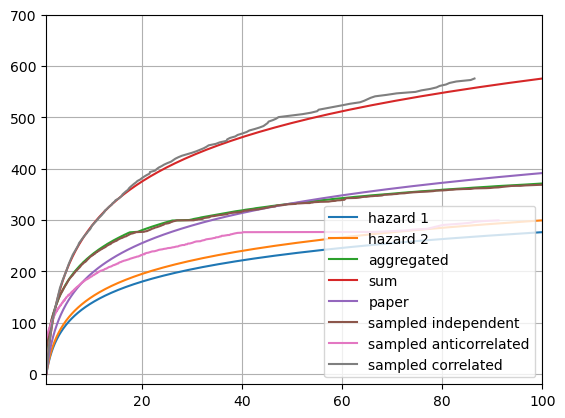

In [9]:
fig, ax = plt.subplots()
for i in [0,1]:
    ax.plot(1/exceedance_curves_carmen[i].exceedance_frequencies, exceedance_curves_carmen[i].values, label=f'hazard {i+1}')


ax.plot(1/agg_curve_carmen.exceedance_frequencies, agg_curve_carmen.values, label='aggregated')
ax.plot(1/exceedance_curves_carmen[0].exceedance_frequencies, np.sum([exceedance_curves_carmen[i].values for i in [0,1]], axis=0), label='sum')
ax.plot(1/exceedance_curves_carmen[0].exceedance_frequencies, values_carmen_combined, label='paper')
ax.plot(1/agg_curve_carmen_sampled[0].exceedance_frequencies, agg_curve_carmen_sampled[0].values, label='sampled independent')
ax.plot(1/agg_curve_carmen_sampled[1].exceedance_frequencies, agg_curve_carmen_sampled[1].values, label='sampled anticorrelated')
ax.plot(1/agg_curve_carmen_sampled[2].exceedance_frequencies, agg_curve_carmen_sampled[2].values, label='sampled correlated')


ax.grid()
ax.legend()
ax.set_xlim(1, 100)
ax.set_ylim(-20, 700)